# Interactions With Aaron Burr

![SegmentLocal](img/6.gif "segment")


![SegmentLocal](img/4.jpg "segment")

In [1]:
import os             
folder = "./data/Interactions With Aaron Burr/"
txt_files = os.listdir(folder)   # imagine you're one directory above test dir
print(txt_files)

['Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798].txt', 'Ebenezer Stevens to Aaron Burr and Alexander Hamilton, 23 January 1800.txt', 'From Alexander Hamilton to Aaron Burr, 10 October 1803.txt', 'From Alexander Hamilton to Aaron Burr, 17 July 1784.txt', 'From Alexander Hamilton to Aaron Burr, 20 June 1804.txt', 'From Alexander Hamilton to Aaron Burr, 22 June 1804.txt', 'From Alexander Hamilton to Aaron Burr, [1 April 1802].txt', 'From Alexander Hamilton to Aaron Burr, [June–October 1787].txt', 'From Alexander Hamilton to Samuel Breese, William Malcom, and Aaron Burr, April 1787.txt', 'Simeon DeWitt to Aaron Burr, Alexander Hamilton, and Ebenezer Stevens, 18 June 1798.txt', 'Statement by Aaron Burr and Alexander Hamilton, [5 July 1799].txt', 'To Alexander Hamilton from Aaron Burr, 15 November 1803.txt', 'To Alexander Hamilton from Aaron Burr, 18 June 1804.txt', 'To Alexander Hamilton from Aaron Burr, 21 June 1804.txt', 'To Alexander Hamilton from A

In [2]:
import pandas as pd
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

Sir
We have carefully attended to the subjects presented to our consideration, by your note of yesterday and now offer to you the result of our reflections.

The idea of a succession of batteries from the Hook, to the City, very naturally occurs in contemplating the defence of this port, and doubtless has advantages. It would present dangers in the approach which may be expected to have considerable influence in dissuading from an enterprise which should have no other object than to lay this City under contribution, but it does not appear to us that its efficacy could be sufficiently relied upon when it is considered how adventurous an Enemy we have to encounter. The mere passage to batteries by ships with leading breezes has so often been proved to be matter of little difficulty, that it cannot be hoped that it would not be effected, if attempted—and the booty of this place may fairly be considered as an adequate temptation to run the risque, to say nothing of the political consequenc

In [3]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/robotmua-640cce327819.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798]
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Ebenezer Stevens to Aaron Burr and Alexander Hamilton, 23 January 1800
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Aaron Burr, 10 October 1803
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: From Alexander Hamilton to Aaron Burr, 17 July 1784
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Aaron Burr, 20 June 1804
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: From Alexander Hamilton to Aaron Burr, 22 June 1804
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Aaron Burr, [1 April 1802]
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Aaron Burr, [June–October 1787]
Sent

In [6]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=names_analysis, values=sentiment_analysis, title="Pie Chart of Interactions with Aaron Burr")])
fig.show()

In [5]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798] Letter
['Sir', 'character', 'Governor', 'ulterior one', 'auxiliaries', 'Governor', 'Alexander Hamilton', 'Aaron Burr', 'Eben', 'Stevens2', 'Bedlow']

Number Entities Named in Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798] Letter
['four', 'three', 'one']

Consumer Entities Named in Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798] Letter
['batteries', 'batteries', 'batteries', 'cannon', 'batteries']

Event Entities Named in Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798] Letter
['succession', 'execution', 'passage', 'examination']

Location Entities Named in Alexander Hamilton, Aaron Burr, and Ebenezer Stevens to James McHenry, [14 June 1798] Letter
['City', 'Hook', 'City', 'City', 'stations', 'NewYork Island', 'Long Islands', 'state', 'Long Island', 'New-York Island

Person Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
['Sir', 'Thompson', 'James Clapp', 'Chap', 'Murray', 'Burr', 'Genl. Hamilton']

Number Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
['5', '4', '2', '2000', 'Seventeen hundred and fifty']

Consumer Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
[]

Event Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
['Sale', 'Ds.']

Location Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
['house', 'house', 'Chapel & Murray St.']

Organization Entities Named in To Alexander Hamilton from Aaron Burr, 15 November 1803 Letter
[]


Person Entities Named in To Alexander Hamilton from Aaron Burr, 18 June 1804 Letter
['D. Cooper', 'Sir', 'Aaron Burr Nyork', 'Van Ness', 'Sir', 'A. Burr', 'Genl. Hamilton']

Number Entities Named in To Alexander Hamilton from Aaron Burr, 18 June 1804 Letter


In [7]:
types1 = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [9]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=types1, values=total_num, title="Pie Chart of Entity Analysis of Interactions With Aaron Burr")])
fig.show()

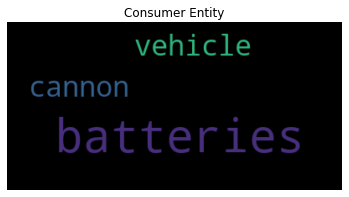

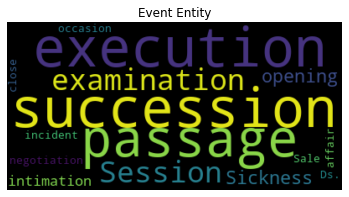

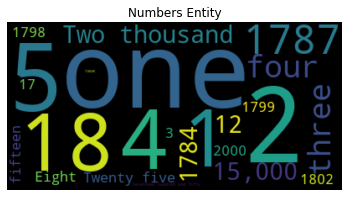

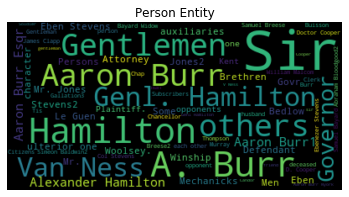

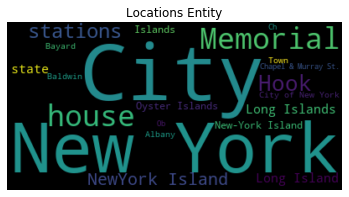

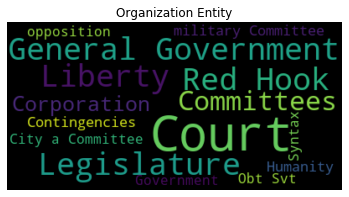

In [10]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PRON
case: NOMINATIVE
number: PLURAL
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: ADV
, tag: VERB
tense: PAST
, tag: ADP
, tag: DET
, tag: NOUN
number: PLURAL
, tag: VERB
tense: PAST
, tag: ADP
, tag: PRON
case: GENITIVE
number: PLURAL
person: FIRST
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: ADP
, tag: PRON
case: GENITIVE
number: SINGULAR
person: SECOND
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: NOUN
number: SINGULAR
, tag: CONJ
, tag: ADV
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: ADP
, tag: PRON
case: ACCUSATIVE
person: SECOND
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: PRON
case: GENITIVE
number: PLURAL
person: FIRST
, tag: NOUN
number: PLURAL
, tag: PUNCT
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: ADP
, tag: DE

In [12]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter From Alexander Hamilton to Aaron Burr, [1 April 1802]
/News/Politics


Classification of Letter From Alexander Hamilton to Aaron Burr, [1 April 1802]
/Law & Government/Government


Classification of Letter From Alexander Hamilton to Aaron Burr, [June–October 1787]
/Law & Government/Government


Classification of Letter From Alexander Hamilton to Samuel Breese, William Malcom, and Aaron Burr, April 1787
/Reference/Humanities/History


Classification of Letter To Alexander Hamilton from Aaron Burr, 15 November 1803
/Arts & Entertainment


Classification of Letter To Alexander Hamilton from Aaron Burr, 18 June 1804
/Arts & Entertainment


Classification of Letter To Alexander Hamilton from Aaron Burr, 21 June 1804
/Reference/Language Resources


